In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
data= pd.read_csv('Company_Data.csv')

In [3]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
data.shape

(400, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [7]:
data['Sales']=pd.cut(data.Sales, bins=[0,5,7,20], labels=['low','medium','high'])

In [8]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,high,138,73,11,276,120,Bad,42,17,Yes,Yes
1,high,111,48,16,260,83,Good,65,10,Yes,Yes
2,high,113,35,10,269,80,Medium,59,12,Yes,Yes
3,high,117,100,4,466,97,Medium,55,14,Yes,Yes
4,low,141,64,3,340,128,Bad,38,13,Yes,No


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        399 non-null    category
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    object  
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    object  
 10  US           400 non-null    object  
dtypes: category(1), int64(7), object(3)
memory usage: 31.9+ KB


In [10]:
data1=data.dropna()

In [11]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        399 non-null    category
 1   CompPrice    399 non-null    int64   
 2   Income       399 non-null    int64   
 3   Advertising  399 non-null    int64   
 4   Population   399 non-null    int64   
 5   Price        399 non-null    int64   
 6   ShelveLoc    399 non-null    object  
 7   Age          399 non-null    int64   
 8   Education    399 non-null    int64   
 9   Urban        399 non-null    object  
 10  US           399 non-null    object  
dtypes: category(1), int64(7), object(3)
memory usage: 34.8+ KB


In [12]:
data1['Sales'].unique()

['high', 'low', 'medium']
Categories (3, object): ['low' < 'medium' < 'high']

In [13]:
label_encoder = preprocessing.LabelEncoder()
data1['Sales']= label_encoder.fit_transform(data1['Sales']) 

<ipython-input-13-98704036c1e9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Sales']= label_encoder.fit_transform(data1['Sales'])


In [14]:
data1['Sales'].unique()

array([0, 1, 2])

In [15]:
data1.Sales.value_counts()

0    216
2    107
1     76
Name: Sales, dtype: int64

In [16]:
data1['ShelveLoc']= label_encoder.fit_transform(data1['ShelveLoc']) 

<ipython-input-16-02ab45e50ccb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['ShelveLoc']= label_encoder.fit_transform(data1['ShelveLoc'])


In [17]:
data1['ShelveLoc'].unique()

array([0, 1, 2])

In [18]:
data1.ShelveLoc.value_counts()

2    218
0     96
1     85
Name: ShelveLoc, dtype: int64

In [19]:
data1['Urban']= label_encoder.fit_transform(data1['Urban']) 

<ipython-input-19-a3af0962bfa2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Urban']= label_encoder.fit_transform(data1['Urban'])


In [20]:
data1['US']= label_encoder.fit_transform(data1['US']) 

<ipython-input-20-3717bf30a044>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['US']= label_encoder.fit_transform(data1['US'])


In [21]:
data1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,138,73,11,276,120,0,42,17,1,1
1,0,111,48,16,260,83,1,65,10,1,1
2,0,113,35,10,269,80,2,59,12,1,1
3,0,117,100,4,466,97,2,55,14,1,1
4,1,141,64,3,340,128,0,38,13,1,0


In [22]:
colnames = list(data1.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [23]:
x=data1[['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']]
y=data1['Sales']

In [24]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=25)

In [25]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=15)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15)

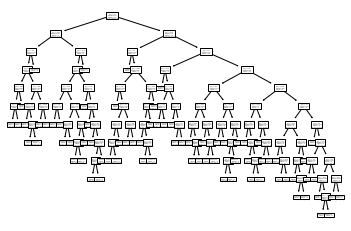

In [26]:
tree.plot_tree(model);

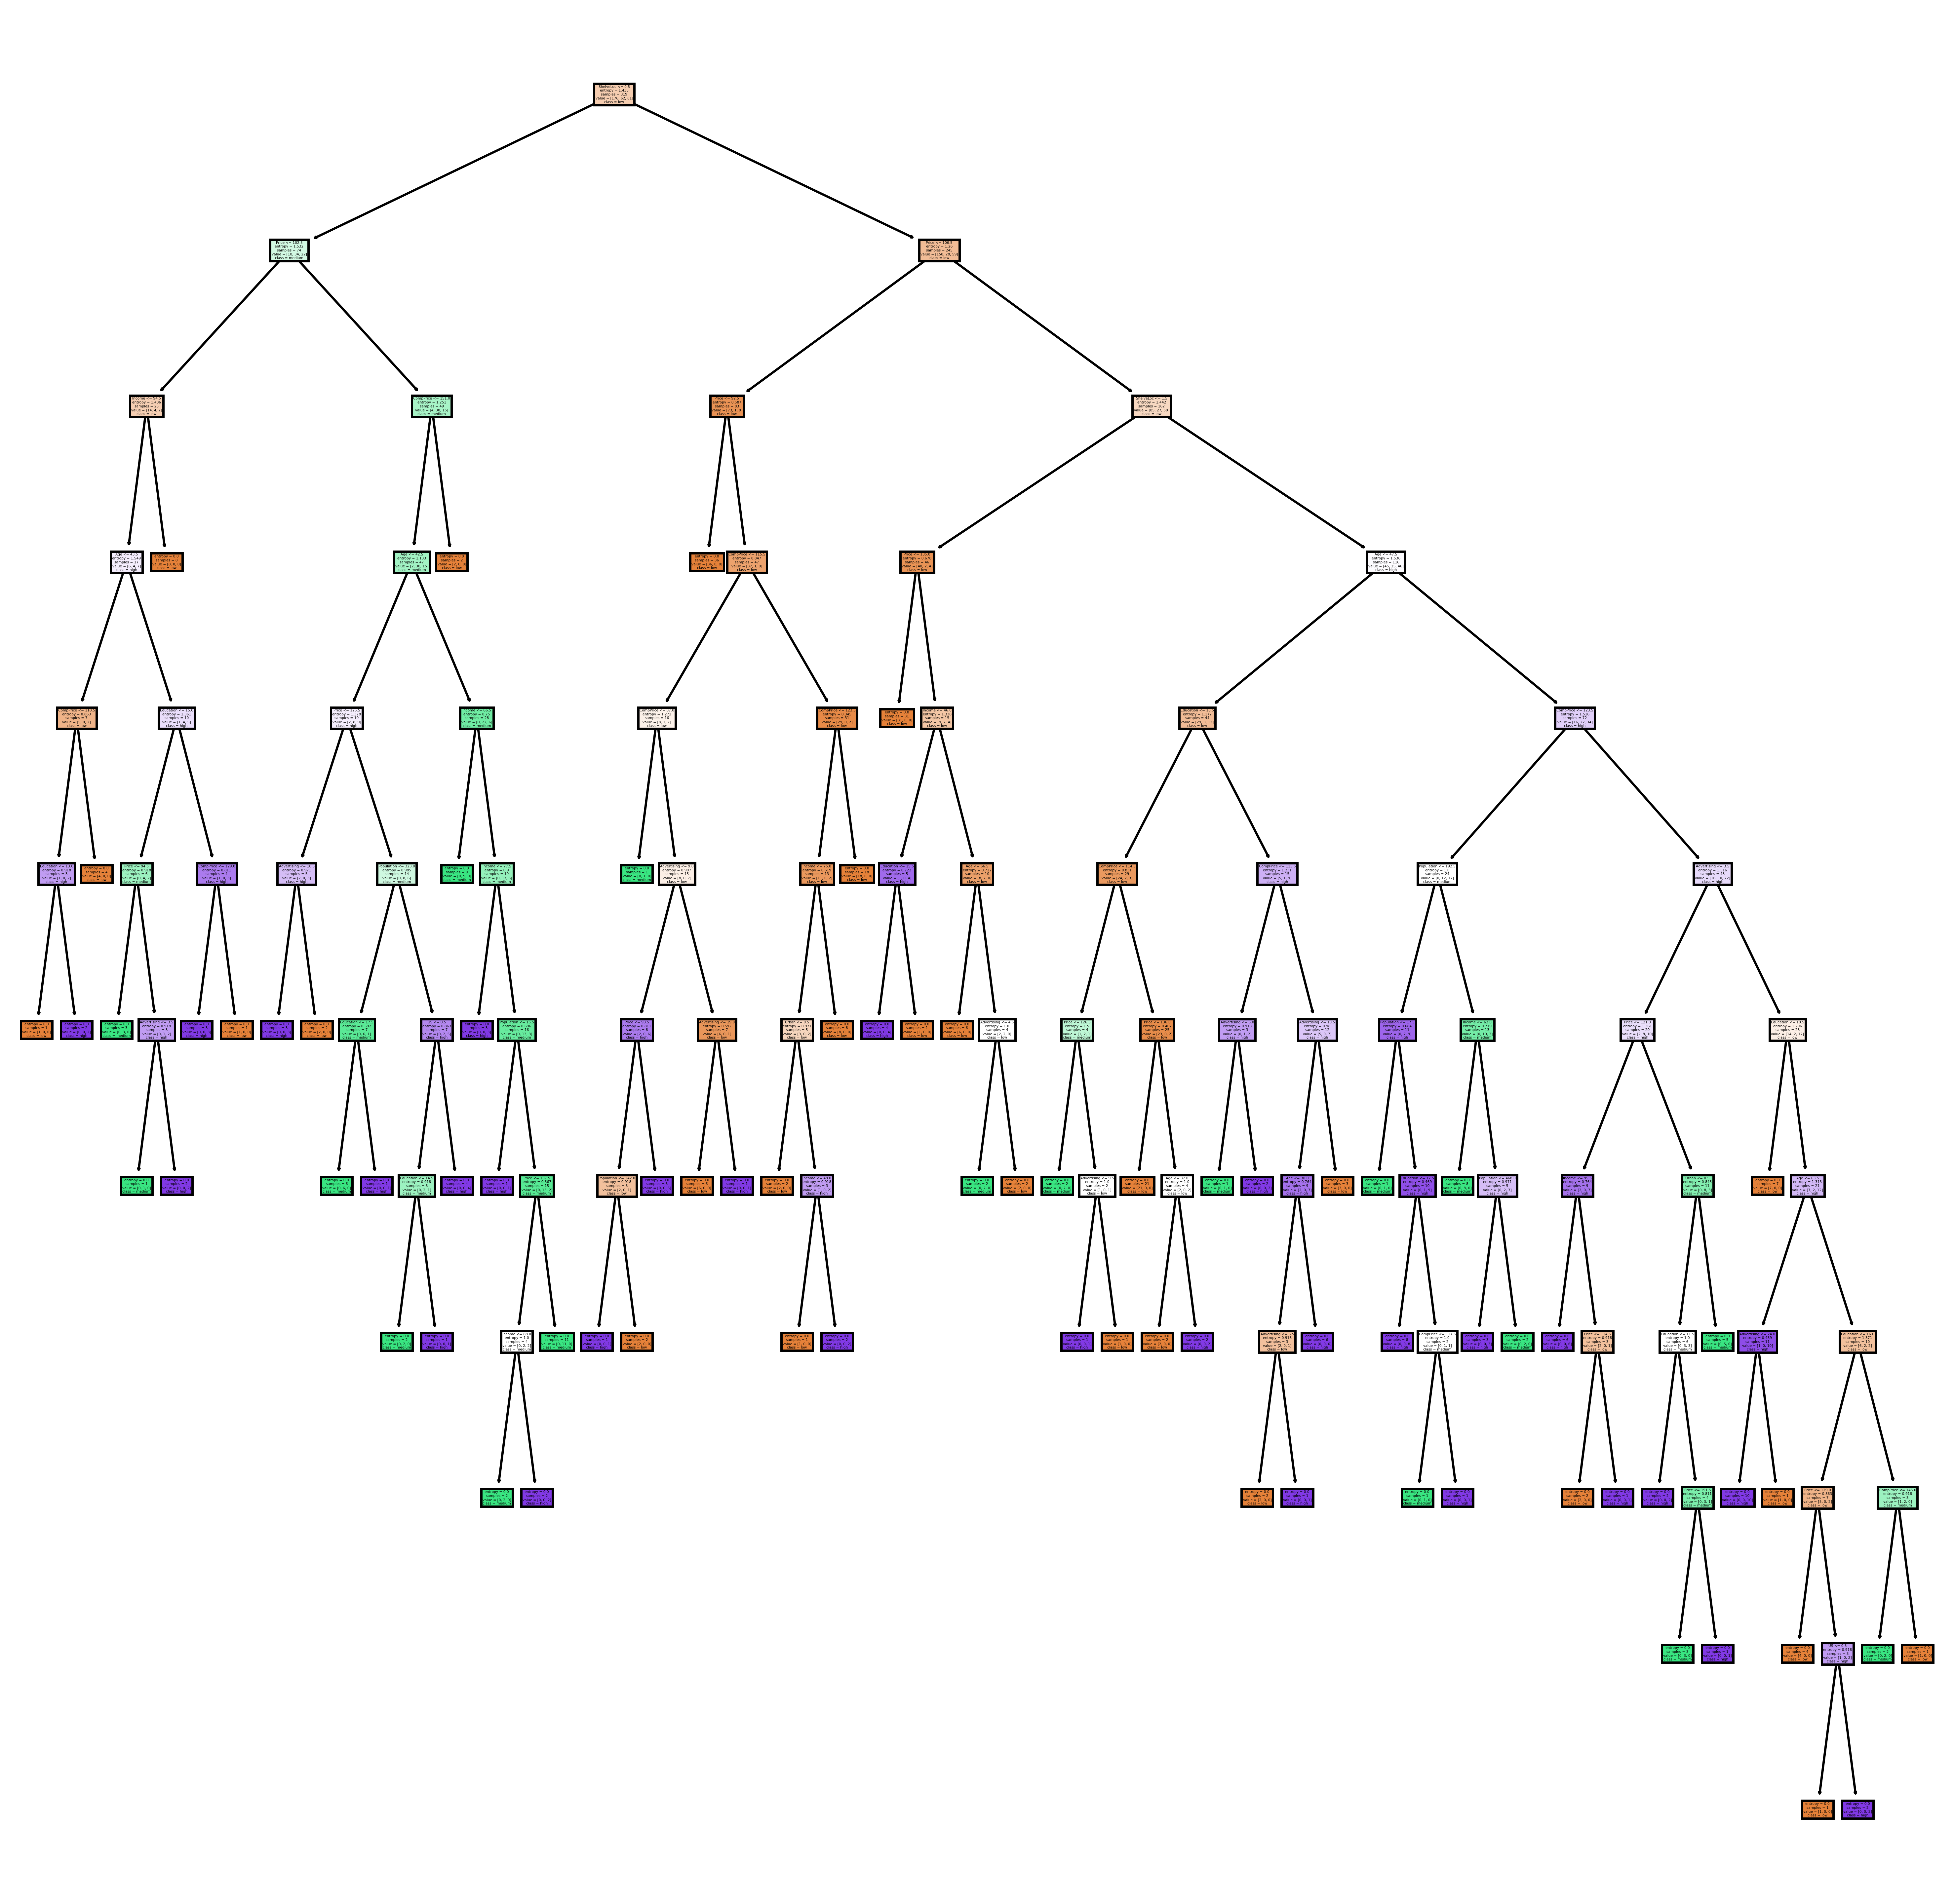

In [27]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['low', 'medium', 'high']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,15), dpi=500)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [28]:
preds = model.predict(x_test) 
pd.Series(preds).value_counts()

0    42
2    19
1    19
dtype: int64

In [29]:
preds

array([0, 2, 0, 1, 2, 2, 0, 2, 0, 1, 0, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 2, 1, 0, 0,
       0, 2, 0, 0, 0, 1, 1, 2, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2,
       2, 0, 0, 1, 0, 2, 0, 2, 2, 0, 1, 2, 0, 1])

In [30]:
pd.crosstab(y_test,preds)

col_0,0,1,2
Sales,,,
0,33,3,4
1,1,9,4
2,8,7,11


In [31]:
np.mean(preds==y_test)

0.6625